1/27/2018

# Summary
Goal of this notebook is to compare the predictive performance of oSBM as we vary overdispersion -- without any block structure. Code organization assumes working directory is notebook folder location.

In [1]:
from __future__ import division
import os
#import igraph
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats.kde import gaussian_kde
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import Grid

# relevant python libraries
execfile('../functions/python_libraries.py')

# oSBM code
execfile('../functions/create_oSBM_class_specific_alternative.py')

# compute homophily + monophily
execfile('../functions/compute_homophily.py')
execfile('../functions/compute_homophily_p_value.py')
execfile('../functions/compute_monophily.py')
execfile('../functions/compute_chi_square.py')



# code for attribute prediction
execfile('../functions/benchmark_classifier.py')
execfile('../functions/LINK.py')
execfile('../functions/majority_vote.py')
execfile('../functions/ZGL.py')

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/kristen/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/kristen/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## [possibly delete] set folder directory paths

In [4]:
#dir_osbm = '/Users/kristen/Dropbox/gender_graph_data/manuscript/nature_hb/gender_graph_final_code_NatureHB/figures/'

## Vary $\phi$ on oSBM without block structure

In [5]:
percent_initially_unlabelled = [0.99, 0.9, 0.5, 0.1]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)
disp_oSBM_array = np.linspace(0,0.004,20)

In [6]:
MV1_results = []
MV2_results = []
MV1_se_results = []
MV2_se_results = []

for j in range(len(disp_oSBM_array)):
    print(str(j) + ": disp " + str(disp_oSBM_array[j]))
    ## create 1 realization from oSBM
    (adj_noByesO_osbm, y_noByesO_osbm) = create_affiliation_model_temp(84,
                                  lambda_block_parameter = 1,
                                           dispersion_parameter_vect = np.array([np.array([disp_oSBM_array[j], disp_oSBM_array[j]]),
                                            np.array([disp_oSBM_array[j], disp_oSBM_array[j]])]),
                                  class_size_vect = np.array([1000,1000]))

    
    ## 1-hop MV
    (mean_accuracy_mv_noByesO, se_accuracy_mv_noByesO, 
     mean_micro_auc_mv_noByesO,se_micro_auc_mv_noByesO, 
     mean_wt_auc_mv_noByesO,se_wt_auc_mv_noByesO) =majority_vote_modified(percent_initially_unlabelled,  
                                                                    np.array(y_noByesO_osbm), 
                                                                    np.array(adj_noByesO_osbm), 
                                                                    num_iter=10) 
    MV1_results.append(mean_wt_auc_mv_noByesO)
    MV1_se_results.append(se_wt_auc_mv_noByesO)


    ## 2-hop MV
    # Squaring the matrix here is computationally expensive; this could probably be done faster.
    adj_noByesO_osbm2= np.matrix(adj_noByesO_osbm)**2
    adj_noByesO_osbm2[range(adj_noByesO_osbm.shape[0]),range(adj_noByesO_osbm.shape[0])]=0

    (mean_accuracy_mv2_noByesO, se_accuracy_m2v_noByesO, 
     mean_micro_auc_mv2_noByesO,se_micro_auc_mv2_noByesO, 
     mean_wt_auc_mv2_noByesO,se_wt_auc_mv2_noByesO) = majority_vote_modified(percent_initially_unlabelled,  
                                                                    np.array(y_noByesO_osbm), 
                                                                    np.array(adj_noByesO_osbm2), 
                                                                    num_iter=10) 
    MV2_results.append(mean_wt_auc_mv2_noByesO)
    MV2_se_results.append(se_wt_auc_mv2_noByesO)

0: disp 0.0
('p_in: ', 0.042000000000000003)
('p_out: ', 0.042000000000000003)

spot-check average degree: 
83.666

spot-check homophily: 
[0.50349483527755923, 0.50144920593096509]

spot-check monophily: 
[0.0, 5.6649186403071566e-05]

0.99
0.9
0.5
0.1
0.99
0.9
0.5
0.1
1: disp 0.000210526315789
('p_in: ', 0.042000000000000003)
('p_out: ', 0.042000000000000003)

spot-check average degree: 
84.0155

spot-check homophily: 
[0.49942270839036812, 0.49945249827417937]

spot-check monophily: 
[0.0022081077429757707, 0.0020508244667484512]

0.99
0.9
0.5
0.1
0.99
0.9
0.5
0.1
2: disp 0.000421052631579
('p_in: ', 0.042000000000000003)
('p_out: ', 0.042000000000000003)

spot-check average degree: 
84.204

spot-check homophily: 
[0.50030299069640338, 0.50081308533241542]

spot-check monophily: 
[0.0038568397231097005, 0.00479330692082269]

0.99
0.9
0.5
0.1
0.99
0.9
0.5
0.1
3: disp 0.000631578947368
('p_in: ', 0.042000000000000003)
('p_out: ', 0.042000000000000003)

spot-check average degree: 
83.8

/Users/kristen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in true_divide


In [7]:
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=15)
font = {
        'size': 13,
        }

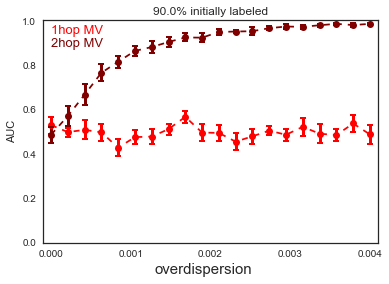

In [8]:
for i in range(len(percent_initially_unlabelled)):
    %matplotlib inline
    plt.errorbar(disp_oSBM_array,
               [j[i] for j in MV1_results],
                 yerr=[j[i] for j in MV1_se_results], 
                 fmt='--o', capthick=2,
            #alpha=0.6, 
                 elinewidth=3, color='red')
    plt.text(0.000001, 0.95, '1hop MV', color = 'red',  fontdict=font)
    plt.text(0.000001, 0.89, '2hop MV', color = 'maroon', fontdict=font)


    plt.errorbar(disp_oSBM_array,
               [j[i] for j in MV2_results], 
                 yerr=[j[i] for j in MV2_se_results], 
                 fmt='--o', capthick=2,
            #alpha=0.6, 
                 elinewidth=3, color = 'maroon') 
    #plt.xlabel('dispersion')
    #plt.xlabel('$\phi^*_{in}$, $\phi^*_{out}$')
    #plt.text(0.0016, -0.15, '$\phi^*_{in}$, $\phi^*_{out}$', fontproperties=font_prop)
    plt.text(0.0013, -0.14, 'overdispersion', fontproperties=font_prop)


    plt.ylabel('AUC')
    plt.ylim(0,1.01)
    plt.xlim(np.min(disp_oSBM_array)-0.0001,np.max(disp_oSBM_array)+0.0001)
    #plt.set_spines["right"].set_visible(False)
    #plt.set_spines["top"].set_visible(False)
    plt.title(np.str((percent_initially_labelled[i] * 100)) + '% initially labeled')
    #plt.tight_layout()
    pp = PdfPages('../../figures/' + np.str((percent_initially_labelled[i] * 100)) + '_with_bars_initially_labeled.pdf')
    pp.savefig()
    pp.close()
    #plt.show()